In [1]:
#imports needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# python environment
# python==3.12.0
# matplotlib == 3.8.3
# numpy == 1.26.4
!conda list

# packages in environment at C:\Users\Corey\anaconda3\envs\panalysis:
#
# Name                    Version                   Build  Channel
anyio                     4.3.0                    pypi_0    pypi
argon2-cffi               23.1.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
arrow                     1.3.0                    pypi_0    pypi
asttokens                 2.4.1                    pypi_0    pypi
async-lru                 2.0.4                    pypi_0    pypi
attrs                     23.2.0                   pypi_0    pypi
babel                     2.14.0                   pypi_0    pypi
beautifulsoup4            4.12.3                   pypi_0    pypi
bleach                    6.1.0                    pypi_0    pypi
bzip2                     1.0.8                h2bbff1b_5  
ca-certificates           2024.3.11            haa95532_0  
certifi                   2024.2.2                 pypi_0    pypi
cffi           

In [3]:
#getting the data for Miller and Ross 
cwd = os.getcwd()
datadir = os.path.join(cwd, 'data')

In [4]:
#setting the path for the 
miller = os.path.join(datadir, "alanmiller.csv")
ross = os.path.join(datadir, "jeanaross.csv")

In [5]:
#load the data for Miller and Ross 
Millerdf = pd.read_csv(miller)
Rossdf = pd.read_csv(ross)

In [6]:
Millerdf.head() #looking at both datasets to see whats inside

,FilingDate,Contributor,CityState,ZipCode,ContributorType,Amount,ContributionDate,ContributionType,Description,RecipientName,ContributionID,RecipeintOrgID,ContSeqID,MAXROWS,RecordCount
0,3/4/2024 11:14:59 PM,GREG SCOFIELD,"GUNTERSVILLE, AL",35976,Individual,200.0,1/26/2024 12:00:00 AM,Cash (Itemized),NaN,ALAN CLIFTON MILLER,1114323,31117,860906,20000,674
1,3/4/2024 11:14:59 PM,NaN,NaN,NaN,NaN,100.0,2/5/2024 12:00:00 AM,Cash (Non-Itemized),NaN,ALAN CLIFTON MILLER,1114325,31117,860907,20000,674
2,3/4/2024 11:14:59 PM,NaN,NaN,NaN,NaN,25.0,2/5/2024 12:00:00 AM,Cash (Non-Itemized),NaN,ALAN CLIFTON MILLER,1114327,31117,860908,20000,674
3,3/4/2024 11:14:59 PM,NaN,NaN,NaN,NaN,100.0,2/7/2024 12:00:00 AM,Cash (Non-Itemized),NaN,ALAN CLIFTON MILLER,1114329,31117,860909,20000,674
4,3/4/2024 11:14:59 PM,ROGER MILLER,"JOPPA, AL",35087,Individual,500.0,2/7/2024 12:00:00 AM,Cash (Itemized),NaN,ALAN CLIFTON MILLER,1114331,31117,860910,20000,674


In [7]:
Rossdf.head()

,FilingDate,Contributor,CityState,ZipCode,ContributorType,Amount,ContributionDate,ContributionType,Description,RecipientName,ContributionID,RecipeintOrgID,ContSeqID,MAXROWS,RecordCount
0,3/19/2024 9:41:31 AM,DANIEL ROSSER,"TUSCUMBIA, AL",35674,Individual,1620.00,10/17/2023 12:00:00 AM,In-Kind (Itemized),NaN,CHARLES DANIEL ROSSER JR.,1115702,30579,862077,20000,395
1,12/7/2021 8:38:39 AM,DEREK W ROSSON,"RAINSVILLE, AL",35986,Individual,1776.70,11/23/2021 12:00:00 AM,In-Kind (Itemized),NaN,DEREK WAYNE ROSSON,839297,29525,662644,20000,395
2,2/1/2022 8:07:22 AM,DEREK W ROSSON,"RAINSVILLE, AL",35986,Individual,400.00,1/3/2022 12:00:00 AM,Cash (Itemized),NaN,DEREK WAYNE ROSSON,859332,29525,681501,20000,395
3,2/1/2022 8:07:22 AM,DEREK W ROSSON,"RAINSVILLE, AL",35986,Individual,1000.00,1/11/2022 12:00:00 AM,Cash (Itemized),NaN,DEREK WAYNE ROSSON,859333,29525,681502,20000,395
4,2/1/2022 8:07:22 AM,DEREK W ROSSON,"RAINSVILLE, AL",35986,Individual,455.04,1/4/2022 12:00:00 AM,In-Kind (Itemized),NaN,DEREK WAYNE ROSSON,859334,29525,681503,20000,395


In [8]:
#lets clean up the dataframe to get only the contributions where miller and ross are reciving the money
Millerdf[Millerdf['RecipientName'] == 'ALAN CLIFTON MILLER']['Amount'].sum()

14308.45

As of 4/3/2024 this is the correct value for Alan Miller. Lets do the same for Jeana Ross and put these two datasets into their own dataframe. 

In [9]:
#lets clean up the dataframe to get only the contributions where miller and ross are reciving the money
Rossdf[Rossdf['RecipientName'] == 'JEANA ROSS']['Amount'].sum()

104844.20999999999

As of 4/3/2024 this is the correct value for Jeana Ross. 

In [10]:
# cleaning the data to just get the datafame that has Jeana and Alan without any other people 
cleanrossdf = Rossdf[Rossdf['RecipientName'] == 'JEANA ROSS']
cleanmillerdf = Millerdf[Millerdf['RecipientName'] == 'ALAN CLIFTON MILLER']

In [11]:
# what are the unique contributor types? 
cleanrossdf['ContributorType'].unique() #the types of contributions

array(['Individual', 'Group/Business/Corporation', 'PAC', nan],
      dtype=object)

In [12]:
cleanmillerdf['ContributorType'].unique()

array(['Individual', nan, 'Group/Business/Corporation'], dtype=object)

In [13]:
#lets ask the question, what PACS contributed to each campaign and how much as of 4/3/2024?
pacsross = cleanrossdf[cleanrossdf['ContributorType'] == 'PAC'].sort_values(by='Amount', ascending=False)

In [14]:
pacsmiller = cleanmillerdf[cleanmillerdf['ContributorType'] == 'PAC'].sort_values(by='Amount', ascending=False)

In [15]:
pacsmiller #this is empty... Interesting. This means he has no PAC money.

,FilingDate,Contributor,CityState,ZipCode,ContributorType,Amount,ContributionDate,ContributionType,Description,RecipientName,ContributionID,RecipeintOrgID,ContSeqID,MAXROWS,RecordCount


In [16]:
cleanmillerdf.to_csv("data/cleandata/Alan_Miller_Contributions.csv")
cleanrossdf.to_csv("data/cleandata/Jeana_Ross_Contributions.csv")

There were no political action committees that contributed to Miller's campaign as of 4/3/2024. However, there were 2 "Group/Business/Corporation" ContributorType in his data. There was one buisness contribution from Union Grove and one from Birmingham. Ross recieved 13 contributions from PACs, 12 of which has the CityState category of "MONTGOMERY, AL." However, there are two Montgomery contributions that are at the same time stamp and same contributor, but have differing amounts. For example, BIPAC gave 10000.0 and 5000.0 contributions on 3/1/2024 but they are listed as seperate transactions. Therefore, there are 13 pac contributions, but 11 come from Montgomery. 

In [17]:
pacsross

,FilingDate,Contributor,CityState,ZipCode,ContributorType,Amount,ContributionDate,ContributionType,Description,RecipientName,ContributionID,RecipeintOrgID,ContSeqID,MAXROWS,RecordCount
64,3/1/2024 5:36:46 PM,BIPAC,"MONTGOMERY, AL",36101,PAC,10000.0,2/5/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1108206,31125,858690,20000,395
122,4/1/2024 11:02:26 AM,FARM PAC,"MONTGOMERY, AL",36191,PAC,7500.0,4/1/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1118749,31125,863763,20000,395
63,3/1/2024 5:36:46 PM,BIPAC,"MONTGOMERY, AL",36101,PAC,5000.0,2/5/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1108205,31125,858689,20000,395
66,3/1/2024 5:36:46 PM,PROGRESS PAC,"MONTGOMERY, AL",36102,PAC,5000.0,2/20/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1111734,31125,858692,20000,395
108,3/16/2024 8:33:19 AM,ALAPAC,"MONTGOMERY, AL",36101,PAC,5000.0,3/14/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1115351,31125,861716,20000,395
112,3/25/2024 9:02:43 AM,TRUST REPRESENTING INVOLVED ALABAMA LAWYERS,"MONTGOMERY, AL",36101,PAC,5000.0,3/21/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1115910,31125,862263,20000,395
117,4/1/2024 9:34:19 AM,CAREPAC,"MONTGOMERY, AL",36123,PAC,5000.0,3/21/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1118449,31125,863637,20000,395
120,4/1/2024 9:34:19 AM,ALABAMA BUILDERS POLITICAL ACTION COMMITTEE,"MONTGOMERY, AL",36124,PAC,2500.0,3/20/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1118452,31125,863640,20000,395
121,4/1/2024 11:02:26 AM,ALABAMA REALTORS POLITICAL ACTION COMMITTEE,"MONTGOMERY, AL",36104,PAC,2500.0,4/1/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1118748,31125,863762,20000,395
68,3/1/2024 5:36:46 PM,STATE FARM AGENTS AND ASSOCIATES OF ALABAMA PAC,"TUSCALOOSA, AL",35406,PAC,1000.0,2/2/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1111736,31125,858694,20000,395


In [18]:
#lets plot Jeana Ross contributions by Pac and City/State
groupedross = pacsross.groupby(['Contributor', 'CityState']).sum().reset_index().sort_values(by='Amount', ascending=False)

In [19]:
pd.set_option('display.max_colwidth', None)
groupedross[['Contributor', 'CityState', 'Amount']].reset_index(drop='index')

,Contributor,CityState,Amount
0,BIPAC,"MONTGOMERY, AL",15000.0
1,FARM PAC,"MONTGOMERY, AL",7500.0
2,ALAPAC,"MONTGOMERY, AL",5000.0
3,CAREPAC,"MONTGOMERY, AL",5000.0
4,PROGRESS PAC,"MONTGOMERY, AL",5000.0
5,TRUST REPRESENTING INVOLVED ALABAMA LAWYERS,"MONTGOMERY, AL",5000.0
6,ALABAMA BUILDERS POLITICAL ACTION COMMITTEE,"MONTGOMERY, AL",2500.0
7,ALABAMA REALTORS POLITICAL ACTION COMMITTEE,"MONTGOMERY, AL",2500.0
8,ALABAMA PHARMACY ASSOCIATION POLITICAL ACTION COMMITTEE,"MONTGOMERY, AL",1000.0
9,AWBA,"MONTGOMERY, AL",1000.0


In [20]:
#lets create a list of locations and pacnames for plotting purposes
locationsross = list(groupedross['CityState']) #where the pacs originate in order by amount
pacname = list(groupedross['Contributor']) #the pac name in order by amount 

In [21]:
locationsross #locations in order by amount of where Ross got PAC money 

['MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'BIRMINGHAM, AL',
 'TUSCALOOSA, AL',
 'MONTGOMERY, AL']

In [22]:
#creating a color for each bar and storing in a list
jeanacolors = {'MONTGOMERY, AL':'red', 'BIRMINGHAM, AL': 'green', 'TUSCALOOSA, AL': 'orange'} #assigning colors by town
jeanabarcolors = [jeanacolors.get(i) for i in locationsross] #creating list of colors to plot by 

In [23]:
jeanabarcolors

['red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'orange',
 'red']

In [24]:
cleanpacname = ['BIPAC', #I am making some of the names shorter for the plot and putting a star beside those that were changed.  
 'FARM PAC',
 'ALAPAC',
 'CAREPAC',
 'PROGRESS PAC',
 'TRIALS*',
 'AL Builders PAC*',
 'AL Realtors PAC*',
 'AL PA PAC*',
 'AWBA',
 'BIG I PAC',
 'SFAAA OF AL PAC*',
 'SV&B PAC']

In [25]:
#creating a legend element that can be used for the plot
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, edgecolor='black', label=location) for location, color in jeanacolors.items()]

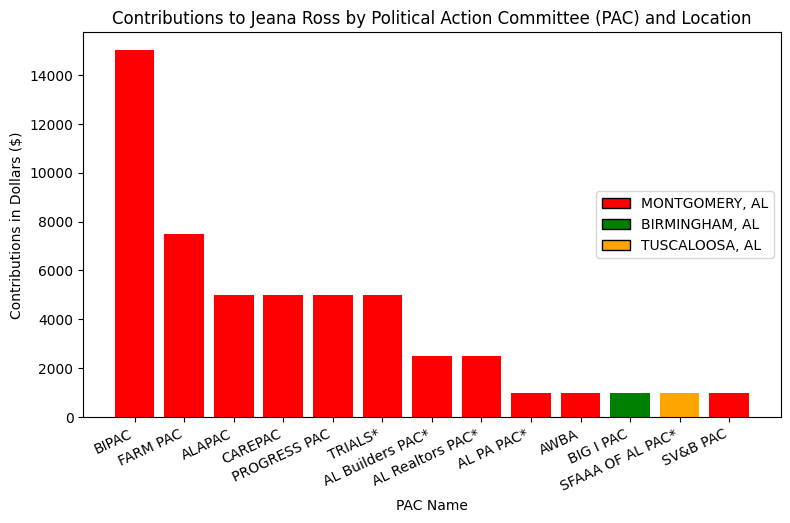

In [26]:
#plot it all
fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(range(len(groupedross)), groupedross['Amount'], color=jeanabarcolors)
ax.set_ylabel('Contributions in Dollars ($)')
ax.set_xlabel('PAC Name')
ax.set_title('Contributions to Jeana Ross by Political Action Committee (PAC) and Location')
ax.set_xticks(range(len(pacname)), cleanpacname, rotation=25, ha='right')
ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1, 0.5))

#ax[1].bar(range(len(businessmiller)), businessmiller['Amount'], color=  , rotation=90)

In [27]:
#now we will plot the contributions by type
groupedross = cleanrossdf.groupby(['ContributorType'], dropna=False)['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

In [28]:
groupedross['ContributorType'] = groupedross['ContributorType'].astype(str)

In [29]:
groupedross

,ContributorType,Amount
2,PAC,52500.00
1,Individual,45949.21
0,Group/Business/Corporation,6245.00
3,nan,150.00


In [30]:
groupedross['ContributorType'].replace('nan', 'Not Itemized', inplace=True)

C:\Users\Corey\AppData\Local\Temp\ipykernel_8264\1323817266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  groupedross['ContributorType'].replace('nan', 'Not Itemized', inplace=True)


In [31]:
contributorcolors = {'PAC':'Red', 'Group/Business/Corporation':'Blue', 'Individual':'Green', 'Not Itemized':'Yellow'}
rosscolors = [contributorcolors.get(str(i)) for i in groupedross['ContributorType']]

In [32]:
rosscontributions = list(groupedross['ContributorType'])

In [33]:
rosscolors

['Red', 'Green', 'Blue', 'Yellow']

In [34]:
groupedmiller = cleanmillerdf.groupby(['ContributorType'], dropna=False)['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

In [35]:
groupedmiller['ContributorType'] = groupedmiller['ContributorType'].astype(str)

In [36]:
groupedmiller['ContributorType'].replace('nan', 'Not Itemized', inplace=True)

C:\Users\Corey\AppData\Local\Temp\ipykernel_8264\4177064833.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  groupedmiller['ContributorType'].replace('nan', 'Not Itemized', inplace=True)


In [37]:
#now we will add PAC donations to millers dataframe to make the data more understandable 
# he has 0 dollars in pac contributions
groupedmiller.loc[len(groupedmiller.index)] = ['PAC', 0.00]
millercolors = [contributorcolors.get(str(i)) for i in groupedmiller['ContributorType']]

In [38]:
groupedmiller

,ContributorType,Amount
1,Individual,11325.00
2,Not Itemized,1983.45
0,Group/Business/Corporation,1000.00
3,PAC,0.00


In [39]:
#Adding colors so that it sorts correctly 
groupedmiller['PlotColors']=millercolors
groupedross['PlotColors']=rosscolors

In [40]:
#now sort by PAC, Individual, Business, and Not Itemized
custom_dict = {'PAC': 0, 'Individual': 1, 'Group/Business/Corporation': 3, 'Not Itemized': 4}
groupedmiller.sort_values(by=['ContributorType'], key=lambda x: x.map(custom_dict), inplace=True)
groupedross.sort_values(by=['ContributorType'], key=lambda x: x.map(custom_dict), inplace=True)

In [41]:
millercontributions = list(groupedmiller['ContributorType']) #putting final contributor list in for Miller

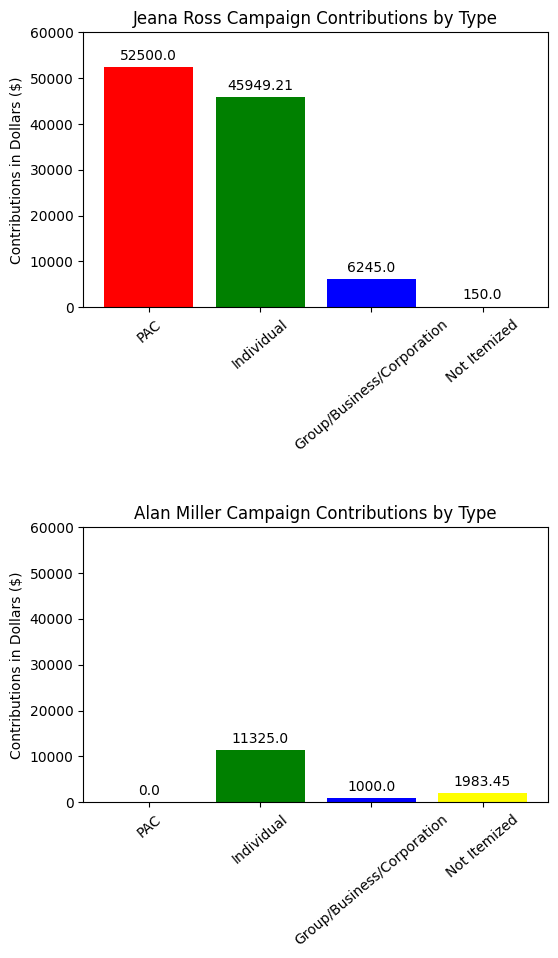

In [42]:
rosscolors = list(groupedross['PlotColors'])
millercolors = list(groupedmiller['PlotColors'])
fig, ax = plt.subplots(figsize=(6, 5*2), nrows=2)
ross = ax[0].bar(groupedross['ContributorType'], groupedross['Amount'], color=rosscolors)
ax[0].set_xticks(range(len(rosscontributions)), rosscontributions, rotation=40)
miller = ax[1].bar(groupedmiller['ContributorType'], groupedmiller['Amount'], color=millercolors)
ax[1].set_xticks(range(len(millercontributions)), millercontributions, rotation=40)
ax[0].set_title('Jeana Ross Campaign Contributions by Type')
ax[1].set_title('Alan Miller Campaign Contributions by Type')
ax[0].set_ylabel('Contributions in Dollars ($)')
ax[1].set_ylabel('Contributions in Dollars ($)')
for p in ross:
   height = p.get_height()
   ax[0].annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

for p in miller:
   height = p.get_height()
   ax[1].annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

ax[0].set_ylim(0, 60000)
ax[1].set_ylim(0, 60000)
fig.subplots_adjust(hspace=0.8)

Looks like there were signifigant differences between the individual contributions between Alan Miller and Jeana Ross. However, it is not clear why the individual contributions were different. Lets plot by contributor and contribution type. 

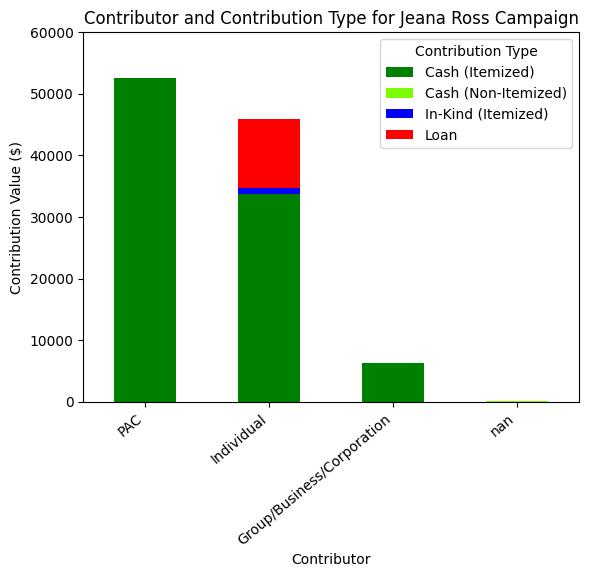

In [43]:
#now we will create summary plots for each of the campaigns that can show contributor and contributor types
contributionsross = cleanrossdf.groupby(['ContributorType', 'ContributionType'], dropna=False)['Amount'].sum()

# Convert contributionsross to DataFrame for easy plotting
contributions_df = contributionsross.unstack()
desired_order = ['PAC', 'Individual', 'Group/Business/Corporation', np.nan]
contributions_df = contributions_df.loc[desired_order]

# Define colors for each contribution type
colors = {'Cash (Itemized)': 'Green', 'Cash (Non-Itemized)':'lawngreen', 'In-Kind (Itemized)': 'blue', 'Loan': 'Red'}
colors = [colors.get(x) for x in contributions_df.columns]
# Plotting with specific colors
bars = contributions_df.plot(kind='bar', stacked=True, color=colors)

plt.title('Contributor and Contribution Type for Jeana Ross Campaign')
plt.xlabel('Contributor')
plt.ylabel('Contribution Value ($)')
# Set y-axis limits
plt.ylim(0, 60000)
plt.legend(loc='upper right', title='Contribution Type')
plt.xticks(rotation=40, ha='right')
plt.show()

In [44]:
#making a table readout
contributionsross = cleanrossdf.groupby(['ContributorType', 'ContributionType'], dropna=False)['Amount'].sum()

# Convert contributionsross to DataFrame for easy plotting
contributions_df = contributionsross.unstack()
desired_order = ['PAC', 'Individual', 'Group/Business/Corporation', np.nan]
contributions_df = contributions_df.loc[desired_order]
contributions_df.stack()

ContributorType             ContributionType   
PAC                         Cash (Itemized)        52500.00
Individual                  Cash (Itemized)        33675.00
                            In-Kind (Itemized)      1040.00
                            Loan                   11234.21
Group/Business/Corporation  Cash (Itemized)         6245.00
NaN                         Cash (Non-Itemized)      150.00
dtype: float64

In [45]:
desired_order = ['PAC', 'Group/Business/Corporation', 'Individual', np.nan]
contributions_df = contributions_df.loc[desired_order]
contributions_df

ContributionType,Cash (Itemized),Cash (Non-Itemized),In-Kind (Itemized),Loan
ContributorType,,,,
PAC,52500.0,NaN,NaN,NaN
Group/Business/Corporation,6245.0,NaN,NaN,NaN
Individual,33675.0,NaN,1040.0,11234.21
NaN,NaN,150.0,NaN,NaN


In [46]:
#what was the loan amount and when?
cleanrossdf[cleanrossdf['ContributionType']=='Loan']

,FilingDate,Contributor,CityState,ZipCode,ContributorType,Amount,ContributionDate,ContributionType,Description,RecipientName,ContributionID,RecipeintOrgID,ContSeqID,MAXROWS,RecordCount
50,2/1/2024 11:06:40 AM,JEANA A ROSS,"GUNTERSVILLE, AL",35976,Individual,10000.00,1/31/2024 12:00:00 AM,Loan,NaN,JEANA ROSS,1085352,31125,844179,20000,395
52,2/1/2024 11:06:40 AM,JEANA A ROSS,"GUNTERSVILLE, AL",35976,Individual,1234.21,1/29/2024 12:00:00 AM,Loan,NaN,JEANA ROSS,1085424,31125,844181,20000,395


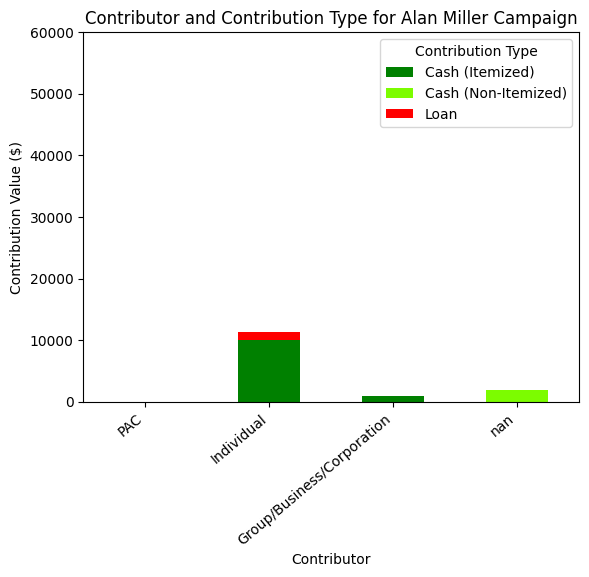

In [47]:
contributionsmiller = cleanmillerdf.groupby(['ContributorType', 'ContributionType'], dropna=False)['Amount'].sum()

# Convert contributionsross to DataFrame for easy plotting
contributions_df = contributionsmiller.unstack()
contributions_df.loc['PAC'] = np.nan #adding nan for 0 in PAC money for comparison
desired_order = ['PAC', 'Individual', 'Group/Business/Corporation', np.nan]
contributions_df = contributions_df.loc[desired_order]

# Define colors for each contribution type
colors = {'Cash (Itemized)': 'Green', 'Cash (Non-Itemized)':'lawngreen', 'In-Kind (Itemized)': 'Orange', 'Loan': 'Red'}
colors = [colors.get(x) for x in contributions_df.columns]
# Plotting with specific colors
bars = contributions_df.plot(kind='bar', stacked=True, color=colors)

plt.title('Contributor and Contribution Type for Alan Miller Campaign')
plt.xlabel('Contributor')
plt.ylabel('Contribution Value ($)')
# Set y-axis limits
plt.ylim(0, 60000)
plt.legend(loc='upper right', title='Contribution Type')
plt.xticks(rotation=40, ha='right')
plt.show()

From the two plots, Jeana got more in individual cash contributions, but had a larger loan. There is also a donation marked as an "Individual (In-Kind Itemized)" donation, it looks like. 

In [48]:
#making a table for readout
contributionsmiller = cleanmillerdf.groupby(['ContributorType', 'ContributionType'], dropna=False)['Amount'].sum()
# Convert contributionsross to DataFrame for easy plotting
contributions_df = contributionsmiller.unstack()
contributions_df.loc['PAC'] = np.nan #adding nan for 0 in PAC money for comparison
desired_order = ['PAC', 'Individual', 'Group/Business/Corporation', np.nan]
contributions_df = contributions_df.loc[desired_order]
contributions_df.stack()

ContributorType             ContributionType   
Individual                  Cash (Itemized)        10075.00
                            Loan                    1250.00
Group/Business/Corporation  Cash (Itemized)         1000.00
NaN                         Cash (Non-Itemized)     1983.45
dtype: float64

In [49]:
#what was the in-kind donation
cleanrossdf[cleanrossdf['ContributionType']=='In-Kind (Itemized)']

,FilingDate,Contributor,CityState,ZipCode,ContributorType,Amount,ContributionDate,ContributionType,Description,RecipientName,ContributionID,RecipeintOrgID,ContSeqID,MAXROWS,RecordCount
114,4/1/2024 9:34:19 AM,JANE MCDONALD,"UNION GROVE, AL",35175,Individual,1040.0,3/28/2024 12:00:00 AM,In-Kind (Itemized),NaN,JEANA ROSS,1118446,31125,863634,20000,395


In [50]:
#how much was the Alan Miller loan and when?
cleanmillerdf[cleanmillerdf['ContributionType'] == 'Loan']

,FilingDate,Contributor,CityState,ZipCode,ContributorType,Amount,ContributionDate,ContributionType,Description,RecipientName,ContributionID,RecipeintOrgID,ContSeqID,MAXROWS,RecordCount
12,3/4/2024 11:14:59 PM,ALAN MILLER,"ARAB, AL",35016,Individual,1250.0,2/24/2024 12:00:00 AM,Loan,NaN,ALAN CLIFTON MILLER,1114360,31117,860918,20000,674


In [51]:
#what were the business contributions and where were they located? Lets look at Ross first
businsessross = cleanrossdf[cleanrossdf['ContributorType']=='Group/Business/Corporation']

In [52]:
row_index = businsessross.loc[businsessross['Contributor'] == 'FLANAGAN CONTRACTING LLC'].index[0] #reseting this to Birmingham because it was mispelled in the dataset
businsessross.loc[row_index, 'CityState'] = 'BIRMINGHAM, AL'

In [53]:
businsessross

,FilingDate,Contributor,CityState,ZipCode,ContributorType,Amount,ContributionDate,ContributionType,Description,RecipientName,ContributionID,RecipeintOrgID,ContSeqID,MAXROWS,RecordCount
55,3/1/2024 5:36:46 PM,WOODALL & HOGGLE INSURANCE AGENCY INC,"GUNTERSVILLE, AL",35976,Group/Business/Corporation,500.0,2/9/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1108197,31125,858681,20000,395
62,3/1/2024 5:36:46 PM,ALABAMA INDEPENDENT AUTO,"BIRMINGHAM, AL",35209,Group/Business/Corporation,1495.0,2/1/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1108204,31125,858688,20000,395
71,3/1/2024 5:36:46 PM,LECROY'S EXCAVATING LLC,"GUNTERSVILLE, AL",35976,Group/Business/Corporation,250.0,2/27/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1111744,31125,858697,20000,395
72,3/1/2024 5:36:46 PM,REED ALABAMA INC.,"UNION GROVE, AL",35175,Group/Business/Corporation,500.0,2/26/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1111768,31125,858698,20000,395
75,3/10/2024 7:02:21 PM,FLANAGAN CONTRACTING LLC,"BIRMINGHAM, AL",35217,Group/Business/Corporation,1000.0,3/1/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1111818,31125,861118,20000,395
77,3/10/2024 7:02:21 PM,MOUNT CARMEL HOMES LLC,"GUNTERSVILLE, AL",35976,Group/Business/Corporation,1000.0,3/1/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1111820,31125,861120,20000,395
101,3/10/2024 7:02:21 PM,JAMES W PORTER II DMD LLC,"GUNTERSVILLE, AL",35976,Group/Business/Corporation,500.0,3/6/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1114793,31125,861144,20000,395
111,3/25/2024 9:02:43 AM,MAZAMA SERVICES LLC,"ALBERTVILLE, AL",35950,Group/Business/Corporation,1000.0,3/18/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1115909,31125,862262,20000,395


(array([0, 1, 2, 3]),
 [Text(0, 0, 'BIRMINGHAM, AL'),
  Text(1, 0, 'GUNTERSVILLE, AL'),
  Text(2, 0, 'ALBERTVILLE, AL'),
  Text(3, 0, 'UNION GROVE, AL')])

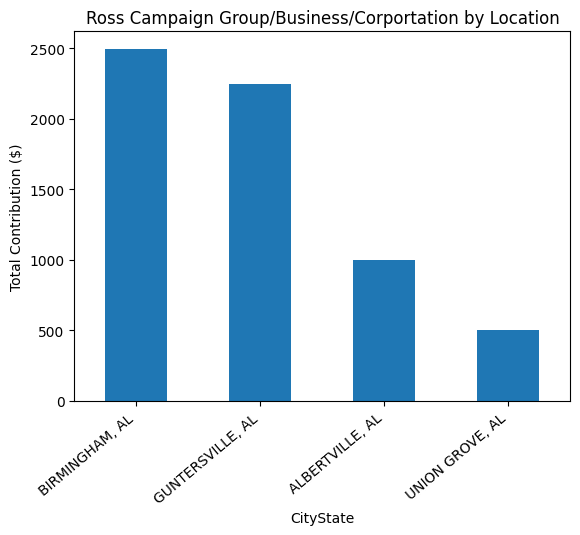

In [54]:
businsessross.groupby(['CityState'])['Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Ross Campaign Group/Business/Corportation by Location')
plt.ylabel('Total Contribution ($)')
plt.xticks(rotation=40, ha='right')

In [55]:
#lets look at miller 
businsessmiller = cleanmillerdf[cleanmillerdf['ContributorType']=='Group/Business/Corporation']

(array([0, 1]), [Text(0, 0, 'BIRMINGHAM, AL'), Text(1, 0, 'UNION GROVE, AL')])

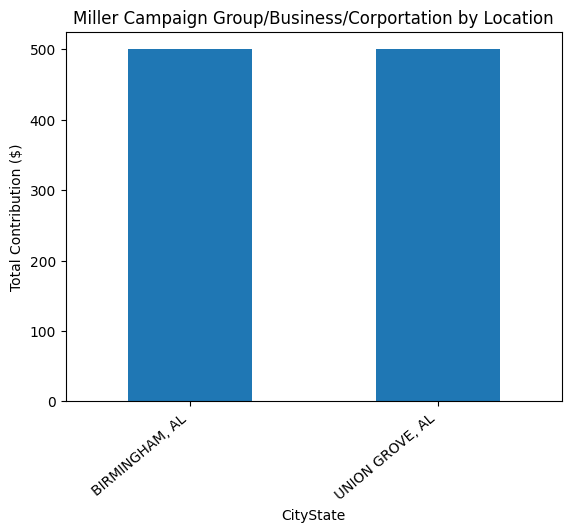

In [56]:
businsessmiller.groupby(['CityState'])['Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Miller Campaign Group/Business/Corportation by Location')
plt.ylabel('Total Contribution ($)')
plt.xticks(rotation=40, ha='right')

In [57]:
businsessmiller.groupby(['CityState'])['Amount'].sum().sort_values(ascending=False) #lets print out the sum tables

CityState
BIRMINGHAM, AL     500.0
UNION GROVE, AL    500.0
Name: Amount, dtype: float64

In [58]:
businsessross.groupby(['CityState'])['Amount'].sum().sort_values(ascending=False)

CityState
BIRMINGHAM, AL      2495.0
GUNTERSVILLE, AL    2250.0
ALBERTVILLE, AL     1000.0
UNION GROVE, AL      500.0
Name: Amount, dtype: float64

In [59]:
businsessmiller

,FilingDate,Contributor,CityState,ZipCode,ContributorType,Amount,ContributionDate,ContributionType,Description,RecipientName,ContributionID,RecipeintOrgID,ContSeqID,MAXROWS,RecordCount
6,3/4/2024 11:14:59 PM,ALABAMA CREDIT UNION LEGISLATIVE ACTION COUNCIL,"BIRMINGHAM, AL",35423,Group/Business/Corporation,500.0,2/20/2024 12:00:00 AM,Cash (Itemized),NaN,ALAN CLIFTON MILLER,1114337,31117,860912,20000,674
21,3/25/2024 8:49:45 PM,"REED ALABAMA, INC.","UNION GROVE, AL",35175,Group/Business/Corporation,500.0,3/6/2024 12:00:00 AM,Cash (Itemized),NaN,ALAN CLIFTON MILLER,1116629,31117,862347,20000,674


In [60]:
# how have things changed as of 4/26 (4 days before runoff)? 
#setting the path for the 
miller426 = os.path.join(datadir, "alanmiller427.csv")
ross426 = os.path.join(datadir, "jeanaross427.csv")

In [61]:
#load the data for Miller and Ross 
Millerdf = pd.read_csv(miller426)
Rossdf = pd.read_csv(ross426)

In [62]:
# cleaning the data to just get the datafame that has Jeana and Alan without any other people 
cleanrossdf = Rossdf[Rossdf['RecipientName'] == 'JEANA ROSS']
cleanmillerdf = Millerdf[Millerdf['RecipientName'] == 'ALAN CLIFTON MILLER']

In [63]:
cleanrossdf

,FilingDate,Contributor,CityState,ZipCode,ContributorType,Amount,ContributionDate,ContributionType,Description,RecipientName,ContributionID,RecipeintOrgID,ContSeqID,MAXROWS,RecordCount
0,2/1/2024 11:06:40 AM,JEANA A ROSS,"GUNTERSVILLE, AL",35976.0,Individual,10000.00,1/31/2024 12:00:00 AM,Loan,NaN,JEANA ROSS,1085352,31125,844179,20000,115
1,2/1/2024 11:06:40 AM,CATHERINE G FULLER,"MONTGOMERY, AL",36111.0,Individual,1000.00,1/31/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1085354,31125,844180,20000,115
2,2/1/2024 11:06:40 AM,JEANA A ROSS,"GUNTERSVILLE, AL",35976.0,Individual,1234.21,1/29/2024 12:00:00 AM,Loan,NaN,JEANA ROSS,1085424,31125,844181,20000,115
3,3/1/2024 5:36:46 PM,ALBERT CHILDRESS,"ALBERTVILLE, AL",35951.0,Individual,200.00,2/2/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1108195,31125,858679,20000,115
4,3/1/2024 5:36:46 PM,BILL AARON,"ALBERTVILLE, AL",35950.0,Individual,200.00,2/2/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1108196,31125,858680,20000,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,4/23/2024 10:09:20 AM,JULIUS BOGGUS,"GUNTERSVILLE, AL",35976.0,Individual,100.00,4/23/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1122264,31125,866764,20000,115
111,4/23/2024 10:09:20 AM,JACQUELIN SPIKE,"GUNTERSVILLE, AL",35976.0,Individual,500.00,4/23/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1122266,31125,866765,20000,115
112,4/23/2024 10:09:20 AM,BRIAN NAUGHTER,"GUNTERSVILLE, AL",35976.0,Individual,150.00,4/23/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1122267,31125,866766,20000,115
113,4/23/2024 10:09:20 AM,CINDY WIGLEY,"BOAZ, AL",35957.0,Individual,250.00,4/23/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1122268,31125,866767,20000,115


In [64]:
cleanmillerdf['Amount'].sum()

28877.95

In [65]:
cleanrossdf['Amount'].sum()

172668.21

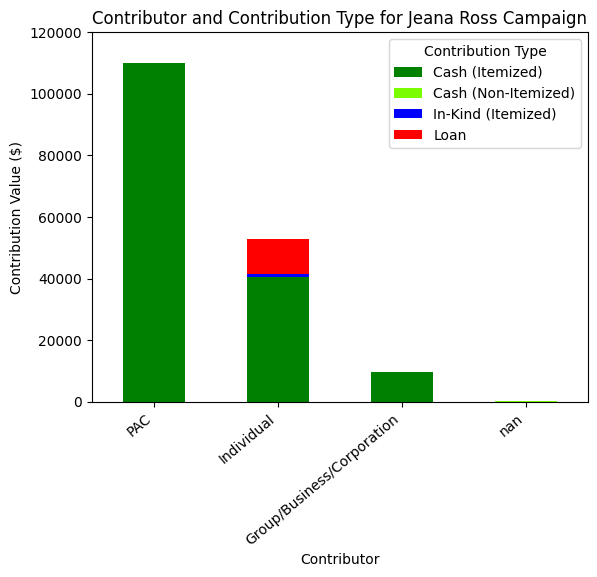

In [66]:
#now we will create summary plots for each of the campaigns that can show contributor and contributor types
contributionsross = cleanrossdf.groupby(['ContributorType', 'ContributionType'], dropna=False)['Amount'].sum()

# Convert contributionsross to DataFrame for easy plotting
contributions_df = contributionsross.unstack()
desired_order = ['PAC', 'Individual', 'Group/Business/Corporation', np.nan]
contributions_df = contributions_df.loc[desired_order]

# Define colors for each contribution type
colors = {'Cash (Itemized)': 'Green', 'Cash (Non-Itemized)':'lawngreen', 'In-Kind (Itemized)': 'blue', 'Loan': 'Red'}
colors = [colors.get(x) for x in contributions_df.columns]
# Plotting with specific colors
bars = contributions_df.plot(kind='bar', stacked=True, color=colors)

plt.title('Contributor and Contribution Type for Jeana Ross Campaign')
plt.xlabel('Contributor')
plt.ylabel('Contribution Value ($)')
# Set y-axis limits
plt.ylim(0, 120000)
plt.legend(loc='upper right', title='Contribution Type')
plt.xticks(rotation=40, ha='right')
plt.show()

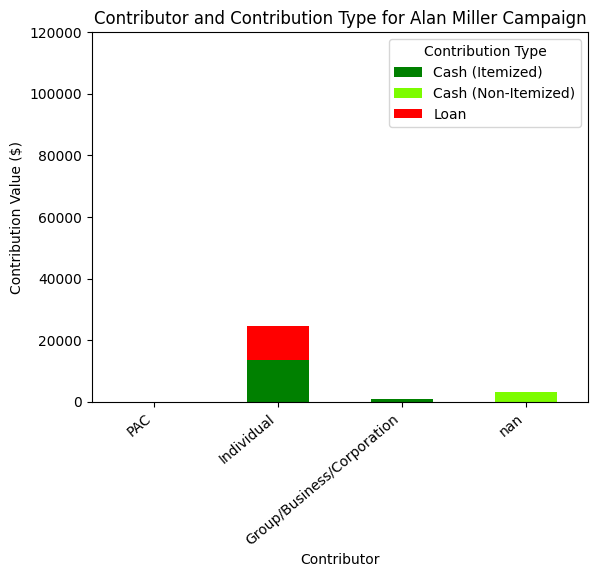

In [67]:
contributionsmiller = cleanmillerdf.groupby(['ContributorType', 'ContributionType'], dropna=False)['Amount'].sum()

# Convert contributionsross to DataFrame for easy plotting
contributions_df = contributionsmiller.unstack()
contributions_df.loc['PAC'] = np.nan #adding nan for 0 in PAC money for comparison
desired_order = ['PAC', 'Individual', 'Group/Business/Corporation', np.nan]
contributions_df = contributions_df.loc[desired_order]

# Define colors for each contribution type
colors = {'Cash (Itemized)': 'Green', 'Cash (Non-Itemized)':'lawngreen', 'In-Kind (Itemized)': 'Orange', 'Loan': 'Red'}
colors = [colors.get(x) for x in contributions_df.columns]
# Plotting with specific colors
bars = contributions_df.plot(kind='bar', stacked=True, color=colors)

plt.title('Contributor and Contribution Type for Alan Miller Campaign')
plt.xlabel('Contributor')
plt.ylabel('Contribution Value ($)')
# Set y-axis limits
plt.ylim(0, 120000)
plt.legend(loc='upper right', title='Contribution Type')
plt.xticks(rotation=40, ha='right')
plt.show()

In [68]:
#lets ask the question, what PACS contributed to each campaign and how much as of 4/26/2024?
pacsross = cleanrossdf[cleanrossdf['ContributorType'] == 'PAC'].sort_values(by='Amount', ascending=False)

In [69]:
pacsross[pacsross['ContributorType']=='PAC']['Amount'].sum()

110000.0

In [70]:
#lets plot Jeana Ross contributions by Pac and City/State
groupedross = pacsross.groupby(['Contributor', 'CityState']).sum().reset_index().sort_values(by='Amount', ascending=False)

In [71]:
pd.set_option('display.max_colwidth', None)
pacby = groupedross[['Contributor', 'CityState', 'Amount']].reset_index(drop='index')
pacby

,Contributor,CityState,Amount
0,BIPAC,"MONTGOMERY, AL",18500.0
1,SV&B PAC,"MONTGOMERY, AL",11000.0
2,TRUST REPRESENTING INVOLVED ALABAMA LAWYERS,"MONTGOMERY, AL",10000.0
3,ALAPAC,"MONTGOMERY, AL",10000.0
4,TIGER PAW PAC,"MONTGOMERY, AL",10000.0
5,FARM PAC,"MONTGOMERY, AL",7500.0
6,SVBI PAC,"MONTGOMERY, AL",5000.0
7,PROGRESS PAC,"MONTGOMERY, AL",5000.0
8,CAREPAC,"MONTGOMERY, AL",5000.0
9,ALA FORESTRY POLITICAL ACTION COMMITTEE,"MONTGOMERY, AL",5000.0


In [72]:
cityamount = pacby[['CityState', 'Amount']].groupby(['CityState']).sum().reset_index().sort_values(by='Amount', ascending=False)

In [73]:
locations = list(cityamount['CityState'].values)

(array([0., 1., 2., 3.]),
 [Text(0.0, 0, 'MONTGOMERY, AL'),
  Text(1.0, 0, 'BIRMINGHAM, AL'),
  Text(2.0, 0, 'IRVING, TX'),
  Text(3.0, 0, 'TUSCALOOSA, AL')])

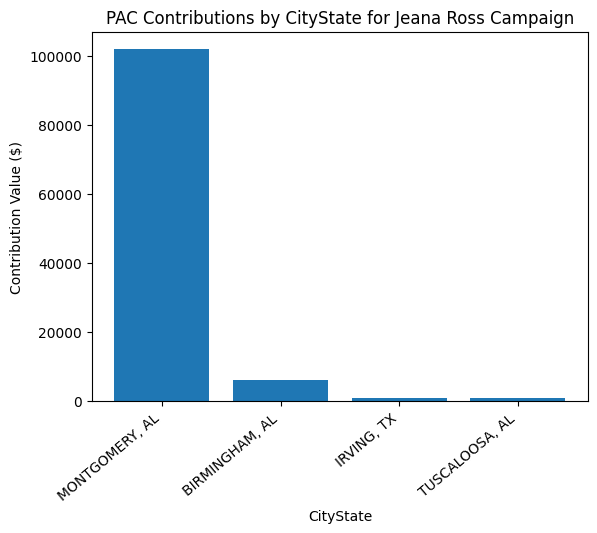

In [74]:
# Plotting with specific colors
plt.bar(cityamount['CityState'], cityamount['Amount'])

plt.title('PAC Contributions by CityState for Jeana Ross Campaign')
plt.xlabel('CityState')
plt.ylabel('Contribution Value ($)')
plt.xticks(cityamount['CityState'], locations)
plt.xticks(rotation=40, ha='right')

In [75]:
cleanmillerdf['ContributorType'].unique()

array(['Individual', nan, 'Group/Business/Corporation'], dtype=object)

In [76]:
cleanrossdf['ContributorType'].unique()

array(['Individual', 'Group/Business/Corporation', 'PAC', nan],
      dtype=object)

In [77]:
cleanrossdf

,FilingDate,Contributor,CityState,ZipCode,ContributorType,Amount,ContributionDate,ContributionType,Description,RecipientName,ContributionID,RecipeintOrgID,ContSeqID,MAXROWS,RecordCount
0,2/1/2024 11:06:40 AM,JEANA A ROSS,"GUNTERSVILLE, AL",35976.0,Individual,10000.00,1/31/2024 12:00:00 AM,Loan,NaN,JEANA ROSS,1085352,31125,844179,20000,115
1,2/1/2024 11:06:40 AM,CATHERINE G FULLER,"MONTGOMERY, AL",36111.0,Individual,1000.00,1/31/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1085354,31125,844180,20000,115
2,2/1/2024 11:06:40 AM,JEANA A ROSS,"GUNTERSVILLE, AL",35976.0,Individual,1234.21,1/29/2024 12:00:00 AM,Loan,NaN,JEANA ROSS,1085424,31125,844181,20000,115
3,3/1/2024 5:36:46 PM,ALBERT CHILDRESS,"ALBERTVILLE, AL",35951.0,Individual,200.00,2/2/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1108195,31125,858679,20000,115
4,3/1/2024 5:36:46 PM,BILL AARON,"ALBERTVILLE, AL",35950.0,Individual,200.00,2/2/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1108196,31125,858680,20000,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,4/23/2024 10:09:20 AM,JULIUS BOGGUS,"GUNTERSVILLE, AL",35976.0,Individual,100.00,4/23/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1122264,31125,866764,20000,115
111,4/23/2024 10:09:20 AM,JACQUELIN SPIKE,"GUNTERSVILLE, AL",35976.0,Individual,500.00,4/23/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1122266,31125,866765,20000,115
112,4/23/2024 10:09:20 AM,BRIAN NAUGHTER,"GUNTERSVILLE, AL",35976.0,Individual,150.00,4/23/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1122267,31125,866766,20000,115
113,4/23/2024 10:09:20 AM,CINDY WIGLEY,"BOAZ, AL",35957.0,Individual,250.00,4/23/2024 12:00:00 AM,Cash (Itemized),NaN,JEANA ROSS,1122268,31125,866767,20000,115
